In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imagesc import imagesc
from scipy.spatial import distance
from undouble import Undouble

[undouble] >WARNING> Lets download the dataset from url: [https://erdogant.github.io/datasets/cat_and_dog.zip]
[undouble] >INFO> Store examples at [/Users/johnson/Desktop/image_process/venv/lib/python3.9/site-packages/undouble/data]..
[undouble] >INFO> Extracting files..
[undouble] >INFO> [3] files are collected recursively from path: [/Users/johnson/Desktop/image_process/venv/lib/python3.9/site-packages/undouble/data/cat_and_dog]
[undouble] >INFO> Reading and checking images.
[undouble] >INFO> Reading and checking images.
100%|██████████| 3/3 [00:00<00:00,  5.64it/s]


ahash Hash:
Binary image hash: 1111111111111101111110011100000111000001000000011110000111111111
Hex image hash: 0xfffdf9c1c101e1ff


[undouble] >INFO> filepath is set to [/var/folders/ld/vvyhl7992v716byfq7fgmbhm0000gn/T/clustimage]
[undouble] >INFO> filepath is set to [/var/folders/ld/vvyhl7992v716byfq7fgmbhm0000gn/T/clustimage]
[undouble] >INFO> filepath is set to [/var/folders/ld/vvyhl7992v716byfq7fgmbhm0000gn/T/clustimage]
[undouble] >WARNING> Lets download the dataset from url: [https://erdogant.github.io/datasets/cat_and_dog.zip]
[undouble] >INFO> Store examples at [/Users/johnson/Desktop/image_process/venv/lib/python3.9/site-packages/undouble/data]..
[undouble] >INFO> Extracting files..
[undouble] >INFO> [3] files are collected recursively from path: [/Users/johnson/Desktop/image_process/venv/lib/python3.9/site-packages/undouble/data/cat_and_dog]
[undouble] >INFO> Reading and checking images.
[undouble] >INFO> Reading and checking images.
100%|██████████| 3/3 [00:00<00:00,  7.48it/s]


dhash Hash:
Binary image hash: 0001111000011001001100110001001100001001010001010000010110000001
Hex image hash: 0x1e19331309450581


[undouble] >INFO> filepath is set to [/var/folders/ld/vvyhl7992v716byfq7fgmbhm0000gn/T/clustimage]
[undouble] >INFO> filepath is set to [/var/folders/ld/vvyhl7992v716byfq7fgmbhm0000gn/T/clustimage]
[undouble] >INFO> filepath is set to [/var/folders/ld/vvyhl7992v716byfq7fgmbhm0000gn/T/clustimage]
[undouble] >WARNING> Lets download the dataset from url: [https://erdogant.github.io/datasets/cat_and_dog.zip]
[undouble] >INFO> Store examples at [/Users/johnson/Desktop/image_process/venv/lib/python3.9/site-packages/undouble/data]..
[undouble] >INFO> Extracting files..
[undouble] >INFO> [3] files are collected recursively from path: [/Users/johnson/Desktop/image_process/venv/lib/python3.9/site-packages/undouble/data/cat_and_dog]
[undouble] >INFO> Reading and checking images.
[undouble] >INFO> Reading and checking images.
100%|██████████| 3/3 [00:00<00:00,  7.29it/s]


whash-haar Hash:
Binary image hash: 1110011111101101110110011100000100000001000000011100000111111101
Hex image hash: 0xe7edd9c10101c1fd


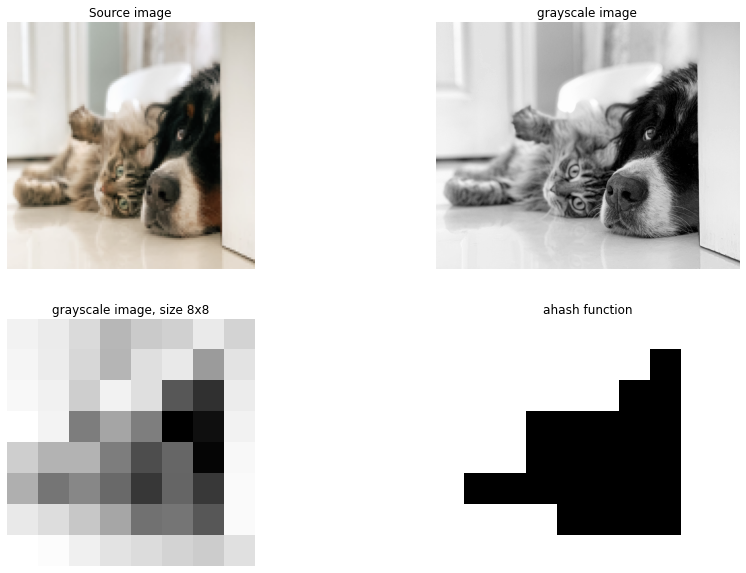

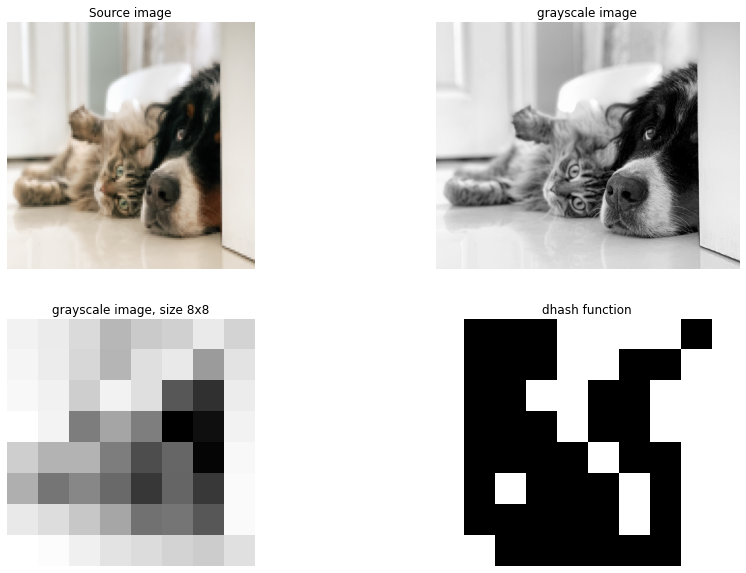

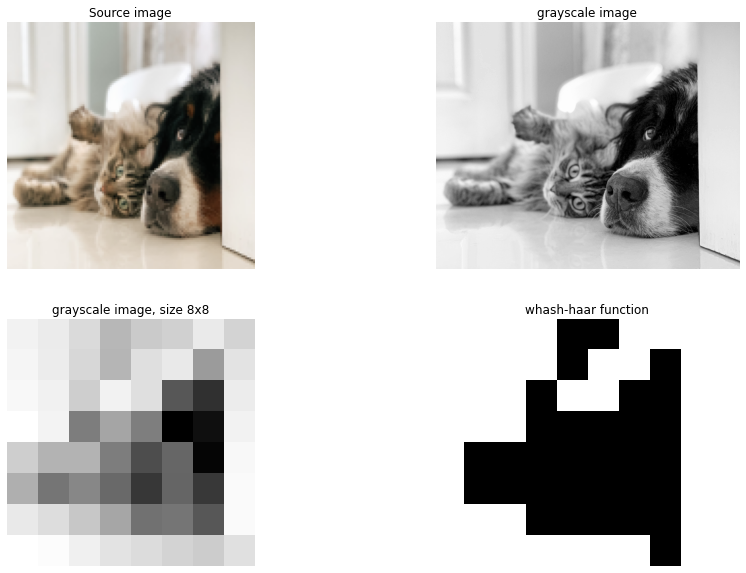

In [2]:
methods = ["ahash", "dhash", "whash-haar"]

for method in methods:
    # Average Hash
    model = Undouble(method=method, hash_size=8)
    # Import example data
    targetdir = model.import_example(data="cat_and_dog")
    # Grayscaling and scaling
    model.import_data(targetdir)
    # Compute image for only the first image.
    hashs = model.compute_imghash(model.results["img"][0], to_array=False)
    # Compute the image-hash
    print(method + " Hash:")
    image_hash = "".join(hashs[0].astype(int).astype(str).ravel())
    print("Binary image hash: %s" % (image_hash))
    print("Hex image hash: %s" % (hex(int(image_hash, 2))))

    # Import image for plotting purposes
    img_g = cv2.imread(model.results["pathnames"][0], cv2.IMREAD_GRAYSCALE)
    img_r = cv2.resize(img_g, (8, 8), interpolation=cv2.INTER_AREA)

    # Make the figure
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].imshow(model.results["img"][0][..., ::-1])
    ax[0][0].axis("off")
    ax[0][0].set_title("Source image")
    ax[0][1].imshow(img_g, cmap="gray")
    ax[0][1].axis("off")
    ax[0][1].set_title("grayscale image")
    ax[1][0].imshow(img_r, cmap="gray")
    ax[1][0].axis("off")
    ax[1][0].set_title("grayscale image, size %.0dx%.0d" % (8, 8))
    ax[1][1].imshow(hashs[0], cmap="gray")
    ax[1][1].axis("off")
    ax[1][1].set_title(method + " function")
